<a href="https://colab.research.google.com/github/hidayetyakupoglu/wind-data/blob/main/T_GF_new_cnn_SON_bigru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 60.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.2
    Uninstalling scikit-learn-1.5.2:
      Successfully uninstalled scikit-learn-1.5.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.22.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [2]:
# prompt: https://github.com/hidayetyakupoglu/wind-data.git  bağlanmak istiyorum,

!git clone https://github.com/hidayetyakupoglu/wind-data.git


Cloning into 'wind-data'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 41 (delta 14), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (41/41), 98.90 MiB | 12.46 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (18/18), done.


In [3]:
!pip install openpyxl
!pip install xgboost
!pip install lightgbm
!pip install imbalanced-learn

In [4]:
# prompt: /content/wind-data/wind_fault.xlsx klasörünü aç
import pandas as pd
import openpyxl





In [5]:
import os
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import preprocessing
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import joblib
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from tensorflow import keras

from numpy.random import seed

#import logging
#logging.basicConfig(level=logging.DEBUG)
#tf._logging.set_verbosity(tf._logging.error)

#tensorflow.random.set_seed
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from keras.layers import GRU, LSTM
from sklearn.metrics import plot_confusion_matrix, classification_report
import plotly.express as px
from sklearn.preprocessing import Normalizer

from keras.layers import Dense
from keras.models import Sequential

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from scipy.spatial.distance import mahalanobis

import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix, classification_report

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import (f_classif, SelectKBest)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn import metrics

from sklearn.feature_extraction.text import CountVectorizer


from imblearn.over_sampling import SMOTE

from matplotlib import pyplot as plt
import seaborn as sns

import tensorflow as tf
sns.set_style('whitegrid')
%matplotlib inline
import keras
import keras.backend as k
from keras.layers import GRU, LSTM
from keras.models import Sequential
from keras.models import Model
from keras import regularizers
from keras.callbacks import History
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [1120]:
#df = pd.read_excel('/content/wind-data/T11_2016.xlsx')
df = pd.read_excel('/content/wind-data/wind_fault.xlsx')


In [1480]:
df1=df.copy()
# prompt: veri çerçevesine fault sütunu ekle, bu satırın fault değerine 'GF' diğerlerine 'NF' yaz

# Assuming 'df' is your DataFrame and the timestamp column is named 'Timestamp'
#df['Fault'] = 'NF'  # Initialize the 'Fault' column with 'NF' for all rows
#df.loc[df['Timestamp'] == '2016-03-03T19:20:00+00:00', 'Fault'] = 'GF'
#df.loc[df['Timestamp'] == '2016-10-17T17:50:00+00:00', 'Fault'] = 'HF'


In [1481]:
# prompt: Unnamed: 0 adlı sütunu sil
dd0=df.copy()
ddf=dd0.copy()
ddf.drop('Unnamed: 0', axis=1, inplace=True)
data=ddf.copy()
dd=data.copy()



In [1482]:
perc=0.30   # test oranı orn:0.3 ise %70 train %30 testtir
fau='GF'   # arıza türleridir 'GF' 'AF' 'MF' 'FF' 'EF'
fau

'GF'

In [1483]:
# prompt: dd Timestamp index yap ve sıraya koy

# Convert the 'Timestamp' column to datetime objects
#dd['Timestamp'] = pd.to_datetime(dd['Timestamp'])

# Set the 'Timestamp' column as the index
#dd = dd.set_index('Timestamp')

# Sort the DataFrame by the index (Timestamp)
#dd = dd.sort_index()

# Now your DataFrame 'dd' has a DateTimeIndex and is sorted chronologically.

In [1484]:
# prompt: Amb_WindSpeed_Max  ve Grd_Prod_Pwr_Max sütunlarının bulunduğu df oluştur

df_newf = dd[['WEC: max. windspeed', 'WEC: max. Power']]
print(df_newf)

       WEC: max. windspeed  WEC: max. Power
0                      9.4                0
1                      8.9                0
2                      9.5                0
3                      8.3                0
4                      9.7                0
...                    ...              ...
49129                  5.5              277
49130                  5.6              191
49131                  6.7              329
49132                  6.6              344
49133                  6.0              458

[49134 rows x 2 columns]


# Z-skoru yöntemi ile filtreleme
mean = df_newf.mean()
std_dev = df_newf.std()
z_scores = (df_newf - mean) / std_dev

threshold_z = 5
filtered_data_z = df_newf[(z_scores.abs() < threshold_z).all(axis=1)]

# IQR yöntemi ile filtreleme
Q1 = df_newf.quantile(0.25)
Q3 = df_newf.quantile(0.75)
IQR = Q3 - Q1
filtered_data_iqr = df_newf[~((df_newf < (Q1 - 1.5 * IQR)) | (df_newf > (Q3 + 1.5 * IQR))).any(axis=1)]

# Sonuçları görüntüleme
print("Z-skoru ile filtrelenmiş veri:")
print(filtered_data_z)
print("\nIQR ile filtrelenmiş veri:")
print(filtered_data_iqr)

# Z-skoru yöntemi ile filtreleme
mean = df_newf.mean()
std_dev = df_newf.std()
z_scores = (df_newf - mean) / std_dev

threshold_z = 5
filtered_data_z = df_newf[(z_scores.abs() < threshold_z).all(axis=1)]

# IQR yöntemi ile filtreleme
Q1 = df_newf.quantile(0.25)
Q3 = df_newf.quantile(0.75)
IQR = Q3 - Q1
filtered_data_iqr = df_newf[~((df_newf < (Q1 - 1.5 * IQR)) | (df_newf > (Q3 + 1.5 * IQR))).any(axis=1)]

# Sonuçları görüntüleme
print("Z-skoru ile filtrelenmiş veri:")
print(filtered_data_z)
print("\nIQR ile filtrelenmiş veri:")
print(filtered_data_iqr)

In [1485]:
# prompt: df_newf yalnızca NF leri seç

df_newf = dd[dd['Fault'] == 'NF'][['WEC: max. windspeed', 'WEC: max. Power']]
print(df_newf)

       WEC: max. windspeed  WEC: max. Power
0                      9.4                0
1                      8.9                0
2                      9.5                0
3                      8.3                0
4                      9.7                0
...                    ...              ...
49129                  5.5              277
49130                  5.6              191
49131                  6.7              329
49132                  6.6              344
49133                  6.0              458

[48581 rows x 2 columns]


In [1486]:
filtered_data_iqr=df_newf.copy()

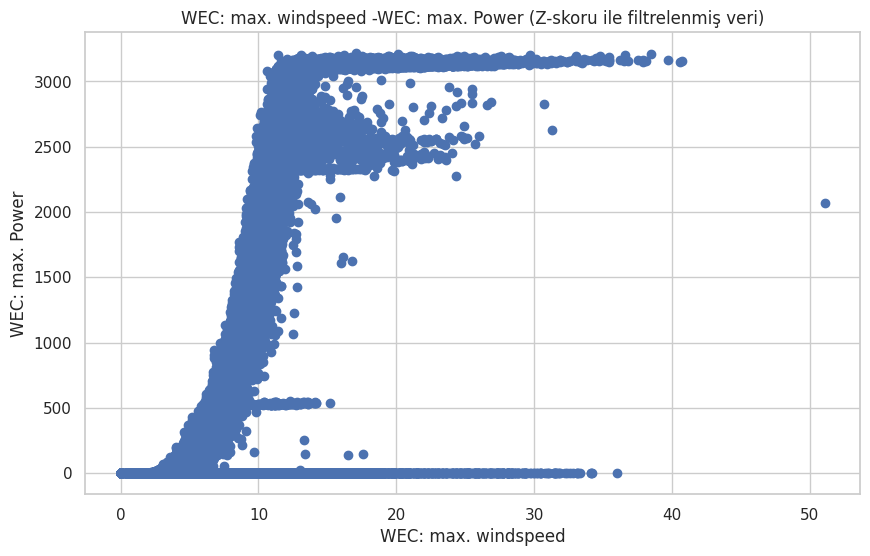

In [1487]:
# prompt: Z-skoru ile filtrelenmiş veri nin Amb_WindSpeed_Max -Grd_Prod_Pwr_Max grafiğini çiz

plt.figure(figsize=(10, 6))
plt.scatter(filtered_data_iqr['WEC: max. windspeed'], filtered_data_iqr['WEC: max. Power'])
plt.xlabel('WEC: max. windspeed')
plt.ylabel('WEC: max. Power')
plt.title('WEC: max. windspeed -WEC: max. Power (Z-skoru ile filtrelenmiş veri)')
plt.show()

In [1488]:
# prompt: (filtered_data_iqr['Amb_WindSpeed_Max'], filtered_data_iqr['Grd_Prod_Pwr_Max'] plotly ile çiz

fig = px.scatter(filtered_data_iqr, x='WEC: max. windspeed', y='WEC: max. Power',
                 title='Amb_WindSpeed_Max vs Grd_Prod_Pwr_Max (IQR ile filtrelenmiş veri)')
fig.show()

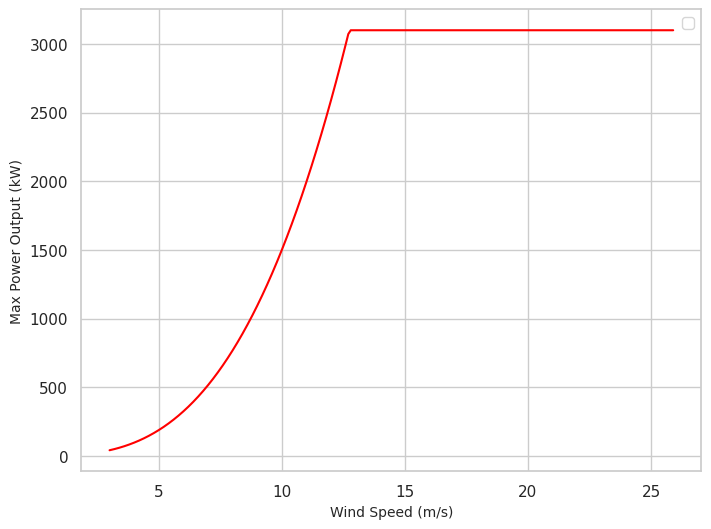

In [1489]:
  # Define the wind speed range
wind_speed = np.arange(3, 26, 0.1)  # From cut-in to cut-out speed

# Calculate power using the formula
power = ((wind_speed ** 3) * (0.5 * 3))

# Limit power to max power output
power[power > 3100] = 3100

# Plot the graph
plt.plot(wind_speed, power, color='red', label='')


plt.xlabel('Wind Speed (m/s)',fontsize=10)
plt.ylabel('Max Power Output (kW)',fontsize=10)
plt.title('',fontsize=10)
plt.grid(True)
plt.legend()
plt.show()

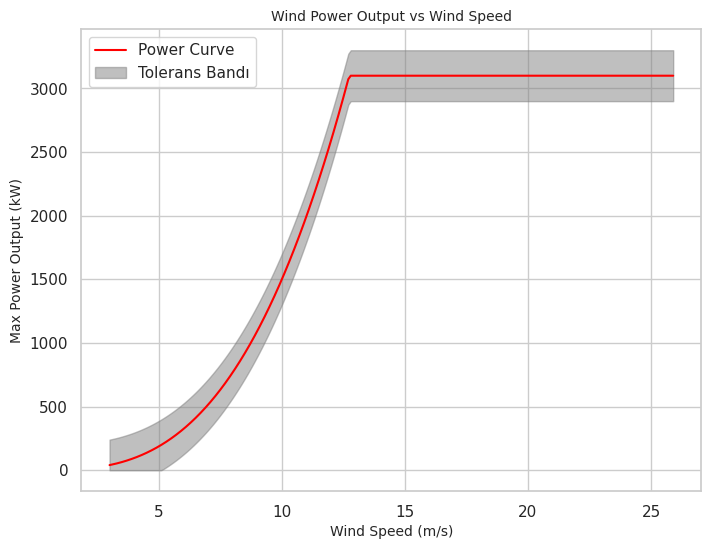

In [1490]:
import numpy as np
import matplotlib.pyplot as plt

# Define the wind speed range
wind_speed = np.arange(3, 26, 0.1)  # From cut-in to cut-out speed

# Calculate power using the formula: P = 0.5 * ρ * A * v^3
# Here, assuming density (ρ) = 1.225 kg/m^3 and area (A) = 1 m^2 for simplicity
power = ((wind_speed ** 3) * (0.5 * 3))

# Limit power to max power output
power[power > 3100] = 3100

# Define tolerans değerleri
tolerans = 200  # kW cinsinden tolerans

# Tolerans bandını hesapla
alt_limit = power - tolerans
ust_limit = power + tolerans

# Limitleri sıfıra düşmemesi için kontrol et
alt_limit[alt_limit < 0] = 0

# Plot the graph
plt.plot(wind_speed, power, color='red', label='Power Curve')
plt.fill_between(wind_speed, alt_limit, ust_limit, color='gray', alpha=0.5, label='Tolerans Bandı')

plt.xlabel('Wind Speed (m/s)', fontsize=10)
plt.ylabel('Max Power Output (kW)', fontsize=10)
plt.title('Wind Power Output vs Wind Speed', fontsize=10)
plt.grid(True)
plt.legend()
plt.show()


In [1491]:
# prompt: ddf'de NF tüm sütunlar için aykırı değerlerini boxplot ile göster ve aykırı değerleri temizle

import matplotlib.pyplot as plt
import pandas as pd #Added import for pandas

ddf=dd.copy()
# Sadece NF verilerini al
nf_data = ddf[ddf['Fault'] == 'NF']
fau_data= ddf[ddf['Fault'] == fau]
# Her sütun için boxplot çiz ve aykırı değerleri tespit et
for column in nf_data.columns[:-1]:  # Son sütun 'Fault', onu hariç tutuyoruz
  if nf_data[column].dtype != 'datetime64[ns]': #Datetime columns cannot be processed by boxplot


    # IQR kullanarak aykırı değerleri tespit et
    Q1 = nf_data[column].quantile(0.2)
    Q3 = nf_data[column].quantile(0.8)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    nf_data = nf_data[(nf_data[column] >= lower_bound) & (nf_data[column] <= upper_bound)]


# Temizlenmiş NF verilerini ddf'ye geri ata
ddf = pd.concat([ddf[ddf['Fault'] != 'NF'], nf_data]) # Changed append to concat


In [1492]:
ddf

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: min. Power,...,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,RTU: ava. Setpoint 1,Inverter averages,Inverter std dev,Fault
1945,2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,0,...,23,27,17,26,35,34,2501,25.818182,0.603023,GF
1946,2014-05-14 14:50:00,6.4,8.6,2.7,4.12,10.71,0.70,0,0,0,...,23,27,17,26,35,34,2501,26.090910,0.943880,GF
1947,2014-05-14 14:58:00,5.6,7.5,4.0,9.99,10.20,9.80,0,0,0,...,23,27,17,26,35,34,2501,26.454546,0.820200,GF
1948,2014-05-14 15:09:00,5.3,6.6,4.1,9.98,10.17,9.79,0,0,0,...,23,27,18,26,35,34,2501,26.181818,0.873863,GF
1949,2014-05-14 15:20:00,5.1,7.2,3.8,9.99,10.17,9.80,0,0,0,...,23,28,18,26,35,34,2501,26.181818,0.981650,GF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,46,...,23,28,9,17,27,35,3050,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,82,...,23,28,9,17,27,35,3050,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,72,...,23,28,9,18,27,34,3050,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,67,...,23,28,9,17,27,34,3050,24.000000,3.376389,NF


In [1493]:
# prompt: max wind speed > 15 ve max power output< 3000 olan NF verilerini temizle
ddf = ddf.drop(ddf[(ddf['WEC: max. windspeed'] > 25) & (ddf.iloc[:, -1] == 'NF')].index)
ddf = ddf.drop(ddf[(ddf['WEC: max. Power'] <= 0) & (ddf.iloc[:, -1] == 'NF')].index)
ddf = ddf.drop(ddf[(ddf['WEC: max. windspeed'] > 5) & (ddf['WEC: max. Power'] == 0) & (ddf.iloc[:, -1] == 'NF')].index)
ddf = ddf.drop(ddf[(ddf['WEC: max. Power'] > 3150) & (ddf.iloc[:, -1] == 'NF')].index)

In [1494]:
# prompt: Amb_WindSpeed_Max değeri 25 ten büyük olan verileri temizle

ddf = ddf[~(ddf['WEC: max. windspeed'] > 25)]
# prompt: ddf Amb_WindSpeed_Max Grd_Prod_Pwr_Max grafiğini plotly kullanarak çiz

import plotly.express as px

fig = px.scatter(ddf, x='WEC: max. windspeed', y='WEC: max. Power', title='Amb_WindSpeed_Max vs Grd_Prod_Pwr_Max')
fig.show()

In [1495]:
# prompt: rüzgar hızı 5 ten büyük olup max power 0 olanları sil



In [1496]:
# prompt: dd verisetindeki index değerlerininden ddf index değerlerinde eşit olan satırları seç

# Assuming 'dd' and 'ddf' are your DataFrames
# Find the common indices between dd and ddf
common_indices = dd.index.intersection(ddf.index)

# Select rows from 'dd' that have the same index values as in 'ddf'
data = dd.loc[common_indices]

# Print the selected rows from 'dd'
print(data)

               DateTime_x  WEC: ava. windspeed  WEC: max. windspeed  \
1945  2014-05-14 14:39:00                  5.7                  7.4   
1946  2014-05-14 14:50:00                  6.4                  8.6   
1947  2014-05-14 14:58:00                  5.6                  7.5   
1948  2014-05-14 15:09:00                  5.3                  6.6   
1949  2014-05-14 15:20:00                  5.1                  7.2   
...                   ...                  ...                  ...   
49129 2015-04-08 23:20:00                  3.9                  5.5   
49130 2015-04-08 23:30:00                  3.9                  5.6   
49131 2015-04-08 23:39:00                  4.2                  6.7   
49132 2015-04-08 23:50:00                  4.1                  6.6   
49133 2015-04-09 00:00:00                  4.8                  6.0   

       WEC: min. windspeed  WEC: ava. Rotation  WEC: max. Rotation  \
1945                   4.1                9.98               10.23   
1946   

In [1497]:
#data=dd    # filtresiz

In [1498]:
# prompt: data veri setine dd veri setinin GF ve HF satırlarını ilave et

# Assuming 'dd' is your DataFrame
# Create a new DataFrame with 'GF' and 'HF' rows from 'dd'
dd_GF_HF = dd[dd['Fault'].isin(['GF', 'MF','AF','FF','EF'])]

# Concatenate 'data' and 'dd_GF_HF' to create a combined DataFrame
data = pd.concat([data, dd_GF_HF])



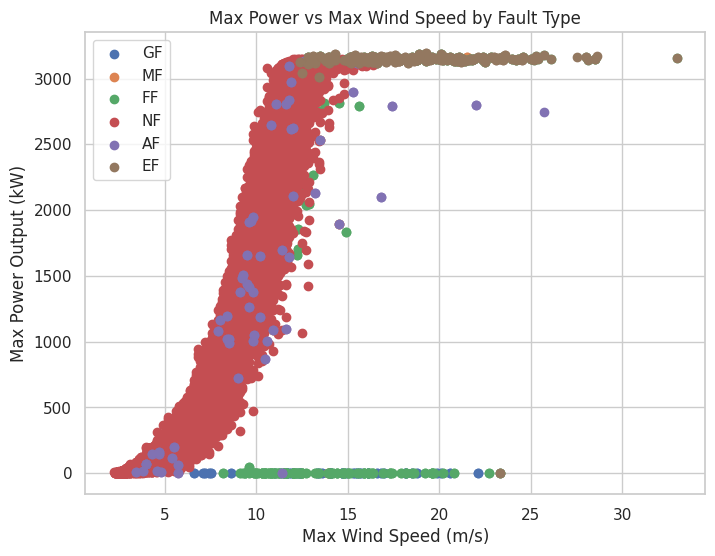

In [1499]:
plt.figure(figsize=(8, 6))
for fault in data['Fault'].unique():
  subset = data[data['Fault'] == fault]
  plt.scatter(subset['WEC: max. windspeed'], subset['WEC: max. Power'], label=fault)

plt.xlabel('Max Wind Speed (m/s)')
plt.ylabel('Max Power Output (kW)')
plt.title('Max Power vs Max Wind Speed by Fault Type')
plt.legend()
plt.grid(True)
plt.show()


In [1500]:
# prompt: PLOTLY İLE GÖSTER

import plotly.express as px

fig = px.scatter(ddf, x='WEC: max. windspeed', y='WEC: max. Power', color='Fault',
                 title='Amb_WindSpeed_Max vs Grd_Prod_Pwr_Max with Fault Type')
fig.show()

In [1501]:
data = data[data['Fault'].isin([fau, 'NF'])]


In [1502]:
# Calculate the count of each fault class
fault_counts = data['Fault'].value_counts()

# Print the counts
print(fault_counts)


Fault
NF    29662
GF       86
Name: count, dtype: int64


data_n1 = data[(data['DateTime_x'] >= '2014-05-10') & (data['DateTime_x'] <= '2014-05-14 14:30:00	')]
data_n2 = data[(data['DateTime_x'] >= '2014-10-13') & (data['DateTime_x'] <= '2014-10-17 11:30:00	')]
data_n3 = data[(data['DateTime_x'] >= '2014-10-22') & (data['DateTime_x'] <= '2014-10-26 18:00:00	')]
data_n4 = data[(data['DateTime_x'] >= '2015-01-03') & (data['DateTime_x'] <= '2015-01-07 18:00:00	')]

In [1503]:
data = data.drop('WEC: Production kWh', axis=1)
data=data.drop('WEC: min. Power',axis=1)
data=data.drop('WEC: ava. available P from wind',axis=1)
data=data.drop('RTU: ava. Setpoint 1',axis=1)
#data_nf = data[data.Fault == 'NF'].sample(40000, random_state = 123)
data_nf=data[data.Fault == 'NF']
data_allF = data[data.Fault != 'NF']


In [1504]:
data=data.sort_index()

In [1505]:
data

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
1945,2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,-84,...,35,23,27,17,26,35,34,25.818182,0.603023,GF
1945,2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,-84,...,35,23,27,17,26,35,34,25.818182,0.603023,GF
1946,2014-05-14 14:50:00,6.4,8.6,2.7,4.12,10.71,0.70,0,0,-80,...,36,23,27,17,26,35,34,26.090910,0.943880,GF
1946,2014-05-14 14:50:00,6.4,8.6,2.7,4.12,10.71,0.70,0,0,-80,...,36,23,27,17,26,35,34,26.090910,0.943880,GF
1947,2014-05-14 14:58:00,5.6,7.5,4.0,9.99,10.20,9.80,0,0,-86,...,36,23,27,17,26,35,34,26.454546,0.820200,GF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,148,...,33,23,28,9,17,27,35,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,148,...,34,23,28,9,17,27,35,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,149,...,34,23,28,9,18,27,34,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,151,...,33,23,28,9,17,27,34,24.000000,3.376389,NF


In [1506]:
# prompt: DUPLİKELERİ TEMİZLE

# ... (Your existing code) ...

# Assuming 'ddf' is your DataFrame
data = data.drop_duplicates()

# ... (Rest of your code) ...

In [1507]:
#data=data.set_index('DateTime_x')
data=data.sort_index()
data

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
1945,2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,-84,...,35,23,27,17,26,35,34,25.818182,0.603023,GF
1946,2014-05-14 14:50:00,6.4,8.6,2.7,4.12,10.71,0.70,0,0,-80,...,36,23,27,17,26,35,34,26.090910,0.943880,GF
1947,2014-05-14 14:58:00,5.6,7.5,4.0,9.99,10.20,9.80,0,0,-86,...,36,23,27,17,26,35,34,26.454546,0.820200,GF
1948,2014-05-14 15:09:00,5.3,6.6,4.1,9.98,10.17,9.79,0,0,-90,...,36,23,27,18,26,35,34,26.181818,0.873863,GF
1949,2014-05-14 15:20:00,5.1,7.2,3.8,9.99,10.17,9.80,0,0,-88,...,37,23,28,18,26,35,34,26.181818,0.981650,GF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49129,2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,148,...,33,23,28,9,17,27,35,24.454546,3.474583,NF
49130,2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,148,...,34,23,28,9,17,27,35,24.454546,3.445683,NF
49131,2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,149,...,34,23,28,9,18,27,34,24.363636,3.413876,NF
49132,2015-04-08 23:50:00,4.1,6.6,2.7,7.02,7.94,6.20,160,344,151,...,33,23,28,9,17,27,34,24.000000,3.376389,NF


In [1508]:
df_f = data[data['Fault'] == fau]
df_filtered = df_f.loc[df_f.groupby(df_f['DateTime_x'].dt.date)['DateTime_x'].idxmin()]

In [1509]:
df_filtered

,DateTime_x,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
1945,2014-05-14 14:39:00,5.7,7.400000,4.1,9.98,10.23,9.72,0,0,-84,...,35,23,27,17,26,35,34,25.818182,0.603023,GF
24322,2014-10-17 11:49:00,13.1,18.799999,3.7,6.14,10.63,0.00,0,0,186,...,23,25,27,17,19,27,45,34.181820,1.662419,GF
25484,2014-10-26 18:10:00,6.9,20.600000,2.6,0.16,1.68,0.00,0,0,273,...,16,19,19,15,16,19,17,17.545454,0.522233,GF
36038,2015-01-07 18:10:00,12.2,20.100000,2.6,8.53,10.44,0.00,0,0,-54,...,29,21,24,12,13,21,31,21.909090,1.375103,GF


In [1510]:

# Zaman endeksini ata
df_filtered.set_index('DateTime_x', inplace=True)
data_nf.set_index('DateTime_x', inplace=True)

# Verileri birleştir
combined_df = pd.concat([df_filtered, data_nf], axis=0)

# Zaman endeksine göre sırala
combined_df.sort_index(inplace=True)

# İndeksi sıfırla (isteğe bağlı)
# combined_df.reset_index(inplace=True)

combined_df



,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,WEC: ava. reactive Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,-84,0,...,35,23,27,17,26,35,34,25.818182,0.603023,GF
2014-06-07 19:59:00,9.2,11.5,7.5,13.04,13.81,11.97,1804,2338,185,-5,...,28,29,32,16,34,42,60,34.090908,1.445998,NF
2014-06-07 20:10:00,9.3,12.2,7.0,13.07,14.16,11.87,1826,2720,183,-5,...,28,29,32,16,34,41,59,33.818180,1.537412,NF
2014-06-07 21:20:00,8.7,11.6,5.6,12.32,13.75,10.27,1513,2262,200,-3,...,28,29,32,16,33,42,60,33.818180,1.470930,NF
2014-06-07 21:29:00,8.6,12.1,5.7,12.27,13.52,9.50,1489,2070,198,-3,...,28,29,32,16,33,42,60,33.727272,1.348400,NF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,148,34,...,33,23,28,9,17,27,35,24.454546,3.474583,NF
2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,148,35,...,34,23,28,9,17,27,35,24.454546,3.445683,NF
2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,149,36,...,34,23,28,9,18,27,34,24.363636,3.413876,NF


In [1511]:

data_af=combined_df.copy()
data_af = data_af.sort_index()
hdata=data_af['Fault'].replace('NF', 0, inplace=True)
hdata=data_af['Fault'].replace(fau, 1, inplace=True)


In [1512]:
data_af

,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,WEC: ava. reactive Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,-84,0,...,35,23,27,17,26,35,34,25.818182,0.603023,1
2014-06-07 19:59:00,9.2,11.5,7.5,13.04,13.81,11.97,1804,2338,185,-5,...,28,29,32,16,34,42,60,34.090908,1.445998,0
2014-06-07 20:10:00,9.3,12.2,7.0,13.07,14.16,11.87,1826,2720,183,-5,...,28,29,32,16,34,41,59,33.818180,1.537412,0
2014-06-07 21:20:00,8.7,11.6,5.6,12.32,13.75,10.27,1513,2262,200,-3,...,28,29,32,16,33,42,60,33.818180,1.470930,0
2014-06-07 21:29:00,8.6,12.1,5.7,12.27,13.52,9.50,1489,2070,198,-3,...,28,29,32,16,33,42,60,33.727272,1.348400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,148,34,...,33,23,28,9,17,27,35,24.454546,3.474583,0
2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,148,35,...,34,23,28,9,17,27,35,24.454546,3.445683,0
2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,149,36,...,34,23,28,9,18,27,34,24.363636,3.413876,0


In [1513]:
# prompt: 2014-11-28 16:30:00 tarihinden sonraki satırları temizle

#data_af = data_af[data_af.index <= '2015-01-11 09:00:00']


In [1514]:
data_af

,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,WEC: ava. reactive Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,-84,0,...,35,23,27,17,26,35,34,25.818182,0.603023,1
2014-06-07 19:59:00,9.2,11.5,7.5,13.04,13.81,11.97,1804,2338,185,-5,...,28,29,32,16,34,42,60,34.090908,1.445998,0
2014-06-07 20:10:00,9.3,12.2,7.0,13.07,14.16,11.87,1826,2720,183,-5,...,28,29,32,16,34,41,59,33.818180,1.537412,0
2014-06-07 21:20:00,8.7,11.6,5.6,12.32,13.75,10.27,1513,2262,200,-3,...,28,29,32,16,33,42,60,33.818180,1.470930,0
2014-06-07 21:29:00,8.6,12.1,5.7,12.27,13.52,9.50,1489,2070,198,-3,...,28,29,32,16,33,42,60,33.727272,1.348400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,148,34,...,33,23,28,9,17,27,35,24.454546,3.474583,0
2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,148,35,...,34,23,28,9,17,27,35,24.454546,3.445683,0
2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,149,36,...,34,23,28,9,18,27,34,24.363636,3.413876,0


In [1515]:
# prompt: duplikeleri sil

data_af = data_af[~data_af.index.duplicated(keep='first')]


In [1516]:
data_af

,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,WEC: ava. reactive Power,...,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-14 14:39:00,5.7,7.4,4.1,9.98,10.23,9.72,0,0,-84,0,...,35,23,27,17,26,35,34,25.818182,0.603023,1
2014-06-07 19:59:00,9.2,11.5,7.5,13.04,13.81,11.97,1804,2338,185,-5,...,28,29,32,16,34,42,60,34.090908,1.445998,0
2014-06-07 20:10:00,9.3,12.2,7.0,13.07,14.16,11.87,1826,2720,183,-5,...,28,29,32,16,34,41,59,33.818180,1.537412,0
2014-06-07 21:20:00,8.7,11.6,5.6,12.32,13.75,10.27,1513,2262,200,-3,...,28,29,32,16,33,42,60,33.818180,1.470930,0
2014-06-07 21:29:00,8.6,12.1,5.7,12.27,13.52,9.50,1489,2070,198,-3,...,28,29,32,16,33,42,60,33.727272,1.348400,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,3.9,5.5,2.2,6.75,7.40,6.01,147,277,148,34,...,33,23,28,9,17,27,35,24.454546,3.474583,0
2015-04-08 23:30:00,3.9,5.6,2.9,6.64,7.06,6.33,128,191,148,35,...,34,23,28,9,17,27,35,24.454546,3.445683,0
2015-04-08 23:39:00,4.2,6.7,2.6,7.18,8.83,6.22,163,329,149,36,...,34,23,28,9,18,27,34,24.363636,3.413876,0


In [1517]:
data_afx= data_af.drop(columns=['Fault'])
data_afy=data_af['Fault']

In [1518]:
data_afy

,Fault
DateTime_x,
2014-05-14 14:39:00,1
2014-06-07 19:59:00,0
2014-06-07 20:10:00,0
2014-06-07 21:20:00,0
2014-06-07 21:29:00,0
...,...
2015-04-08 23:20:00,0
2015-04-08 23:30:00,0
2015-04-08 23:39:00,0


In [1519]:
scaler1 = preprocessing.MinMaxScaler()

x_new = pd.DataFrame(scaler1.fit_transform(data_afx),
                              columns = data_afx.columns,
                              index = data_afx.index)

In [1520]:
x_new

,WEC: ava. windspeed,WEC: max. windspeed,WEC: min. windspeed,WEC: ava. Rotation,WEC: max. Rotation,WEC: min. Rotation,WEC: ava. Power,WEC: max. Power,WEC: ava. Nacel position including cable twisting,WEC: ava. reactive Power,...,Main carrier temp.,Rectifier cabinet temp.,Yaw inverter cabinet temp.,Fan inverter cabinet temp.,Ambient temp.,Tower temp.,Control cabinet temp.,Transformer temp.,Inverter averages,Inverter std dev
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-05-14 14:39:00,0.367521,0.282609,0.436170,0.695467,0.620464,0.712610,0.000000,0.000000,0.470091,0.031250,...,0.40,0.575758,0.40,0.370370,0.485714,0.689655,0.678571,0.386364,0.474820,0.044914
2014-06-07 19:59:00,0.666667,0.505435,0.797872,0.912181,0.880261,0.877566,0.635211,0.742222,0.632628,0.011719,...,0.72,0.363636,0.64,0.555556,0.457143,0.965517,0.928571,0.977273,0.802158,0.235647
2014-06-07 20:10:00,0.675214,0.543478,0.744681,0.914306,0.905660,0.870235,0.642958,0.863492,0.631420,0.011719,...,0.72,0.363636,0.64,0.555556,0.457143,0.965517,0.892857,0.954545,0.791367,0.256330
2014-06-07 21:20:00,0.623932,0.510870,0.595745,0.861190,0.875907,0.752933,0.532746,0.718095,0.641692,0.019531,...,0.68,0.363636,0.64,0.555556,0.457143,0.931034,0.928571,0.977273,0.791367,0.241288
2014-06-07 21:29:00,0.615385,0.538043,0.606383,0.857649,0.859216,0.696481,0.524296,0.657143,0.640483,0.019531,...,0.68,0.363636,0.64,0.555556,0.457143,0.931034,0.928571,0.977273,0.787770,0.213564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.213675,0.179348,0.234043,0.466714,0.415094,0.440616,0.051761,0.087937,0.610272,0.164062,...,0.48,0.515152,0.40,0.407407,0.257143,0.379310,0.392857,0.409091,0.420863,0.694638
2015-04-08 23:30:00,0.213675,0.184783,0.308511,0.458924,0.390421,0.464076,0.045070,0.060635,0.610272,0.167969,...,0.44,0.545455,0.40,0.407407,0.257143,0.379310,0.392857,0.409091,0.420863,0.688099
2015-04-08 23:39:00,0.239316,0.244565,0.276596,0.497167,0.518868,0.456012,0.057394,0.104444,0.610876,0.171875,...,0.44,0.545455,0.40,0.407407,0.257143,0.413793,0.392857,0.386364,0.417266,0.680902


In [1521]:
# prompt: Xgboost ile feature selection uygulka

import xgboost as xgb

# Create an XGBClassifier object
model = xgb.XGBClassifier()


# Fit the model to the data
model.fit(x_new, data_afy)

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_xgb = feature_importances['feature'][:15]


                                              feature  importance
1                                 WEC: max. windspeed    0.212997
2                                 WEC: min. windspeed    0.177130
10                           WEC: max. reactive Power    0.129358
7                                     WEC: max. Power    0.124517
4                                  WEC: max. Rotation    0.111194
9                            WEC: ava. reactive Power    0.110483
37                                      Rotor temp. 2    0.053625
6                                     WEC: ava. Power    0.045515
38                                     Stator temp. 1    0.013832
53                                   Inverter std dev    0.007999
8   WEC: ava. Nacel position including cable twisting    0.006960
29                                 Rear bearing temp.    0.006390
42                                      Nacelle temp.    0.000000
35                                      Blade C temp.    0.000000
36        

In [1522]:
# Ensure x_new and data_afy have the same number of rows
x_new = x_new.loc[data_afy.index]  # Select rows from x_new that match the index of data_afy

# Convert data_afy to a consistent data type (e.g., all integers)
data_afy = pd.to_numeric(data_afy, errors='coerce') # 'coerce' will replace invalid values with NaN

# If you have NaN values after conversion, handle them (e.g., drop rows or impute values)
# For this example, let's drop rows with NaNs
data_afy = data_afy.dropna()
x_new = x_new.loc[data_afy.index]  # Update x_new again after dropping NaNs from data_afy

# Create an XGBClassifier object
model = xgb.XGBClassifier()

# Fit the model to the data
model.fit(x_new, data_afy)

# Get the feature importances
importances = model.feature_importances_

# Create a dataframe with feature names and importances
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': importances})

# Sort the dataframe by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_xgb = feature_importances['feature'][:15]

                                              feature  importance
1                                 WEC: max. windspeed    0.212997
2                                 WEC: min. windspeed    0.177130
10                           WEC: max. reactive Power    0.129358
7                                     WEC: max. Power    0.124517
4                                  WEC: max. Rotation    0.111194
9                            WEC: ava. reactive Power    0.110483
37                                      Rotor temp. 2    0.053625
6                                     WEC: ava. Power    0.045515
38                                     Stator temp. 1    0.013832
53                                   Inverter std dev    0.007999
8   WEC: ava. Nacel position including cable twisting    0.006960
29                                 Rear bearing temp.    0.006390
42                                      Nacelle temp.    0.000000
35                                      Blade C temp.    0.000000
36        

In [1523]:
# prompt: feature selection threshold 0.02 nin altındakileri çıkart

# Filter features with importance greater than 0.02
selected_features_xgb = feature_importances[feature_importances['importance'] > 0.01]['feature']
dim=len(selected_features_xgb)
dim

9

In [1524]:
# prompt: kaç adet olduğunu belirle

len(selected_features_xgb)


9

In [1525]:
# prompt: Dense-Net kullanarak feature selection yap
'''

from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_new, data_afy, test_size=0.2, random_state=42)

# Define the Dense-Net model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(x_new.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

# Get the feature importances from the trained model
importances = model.layers[0].get_weights()[0]
feature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': np.mean(np.abs(importances), axis=1)})
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the top 10 features
print(feature_importances.head(15))

# Select the top 10 features
selected_features_dense = feature_importances['feature'][:15]

'''

"\n\nfrom keras.layers import Dense\nfrom keras.models import Sequential\nfrom sklearn.model_selection import train_test_split\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(x_new, data_afy, test_size=0.2, random_state=42)\n\n# Define the Dense-Net model\nmodel = Sequential()\nmodel.add(Dense(64, activation='tanh', input_shape=(x_new.shape[1],)))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dense(1, activation='sigmoid'))\n\n# Compile the model\nmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])\n\n# Train the model\nmodel.fit(X_train, y_train, epochs=20, batch_size=32)\n\n# Evaluate the model\nloss, accuracy = model.evaluate(X_test, y_test)\nprint('Test accuracy:', accuracy)\n\n# Get the feature importances from the trained model\nimportances = model.layers[0].get_weights()[0]\nfeature_importances = pd.DataFrame({'feature': x_new.columns, 'importance': np.mean(np.abs(importances), axis=1)})\

In [1526]:
my_dict = {}
my_list = selected_features_xgb          #kbest             common_selected               #my_list = selectlist
my_tuple = tuple(my_list)
my_dict[my_tuple] = "value"
my_tuple

('WEC: max. windspeed',
 'WEC: min. windspeed',
 'WEC: max. reactive Power',
 'WEC: max. Power',
 'WEC: max. Rotation',
 'WEC: ava. reactive Power',
 'Rotor temp. 2',
 'WEC: ava. Power',
 'Stator temp. 1')

In [1527]:
my_list

,feature
1,WEC: max. windspeed
2,WEC: min. windspeed
10,WEC: max. reactive Power
7,WEC: max. Power
4,WEC: max. Rotation
9,WEC: ava. reactive Power
37,Rotor temp. 2
6,WEC: ava. Power
38,Stator temp. 1


In [1528]:
x_new = x_new.reindex(columns = my_tuple)
x_new['Fault']=data_af['Fault']
data_af=x_new
corr_matrixx = data_af.corr()
corr_matrixx['Fault'].sort_values(ascending=False)

,Fault
Fault,1.000000
WEC: max. windspeed,0.039626
WEC: max. Rotation,-0.006930
WEC: min. windspeed,-0.007176
WEC: ava. Power,-0.013253
WEC: max. Power,-0.013354
WEC: max. reactive Power,-0.015886
WEC: ava. reactive Power,-0.018284
Stator temp. 1,-0.025967
Rotor temp. 2,-0.033262


In [1529]:
data_af

,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,Fault
DateTime_x,,,,,,,,,,
2014-05-14 14:39:00,0.282609,0.436170,0.013468,0.000000,0.620464,0.031250,0.32,0.000000,0.211765,1
2014-06-07 19:59:00,0.505435,0.797872,0.010101,0.742222,0.880261,0.011719,0.98,0.635211,0.741176,0
2014-06-07 20:10:00,0.543478,0.744681,0.023569,0.863492,0.905660,0.011719,0.94,0.642958,0.729412,0
2014-06-07 21:20:00,0.510870,0.595745,0.037037,0.718095,0.875907,0.019531,0.96,0.532746,0.741176,0
2014-06-07 21:29:00,0.538043,0.606383,0.043771,0.657143,0.859216,0.019531,0.90,0.524296,0.705882,0
...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.179348,0.234043,0.154882,0.087937,0.415094,0.164062,0.60,0.051761,0.352941,0
2015-04-08 23:30:00,0.184783,0.308511,0.158249,0.060635,0.390421,0.167969,0.58,0.045070,0.352941,0
2015-04-08 23:39:00,0.244565,0.276596,0.161616,0.104444,0.518868,0.171875,0.58,0.057394,0.352941,0


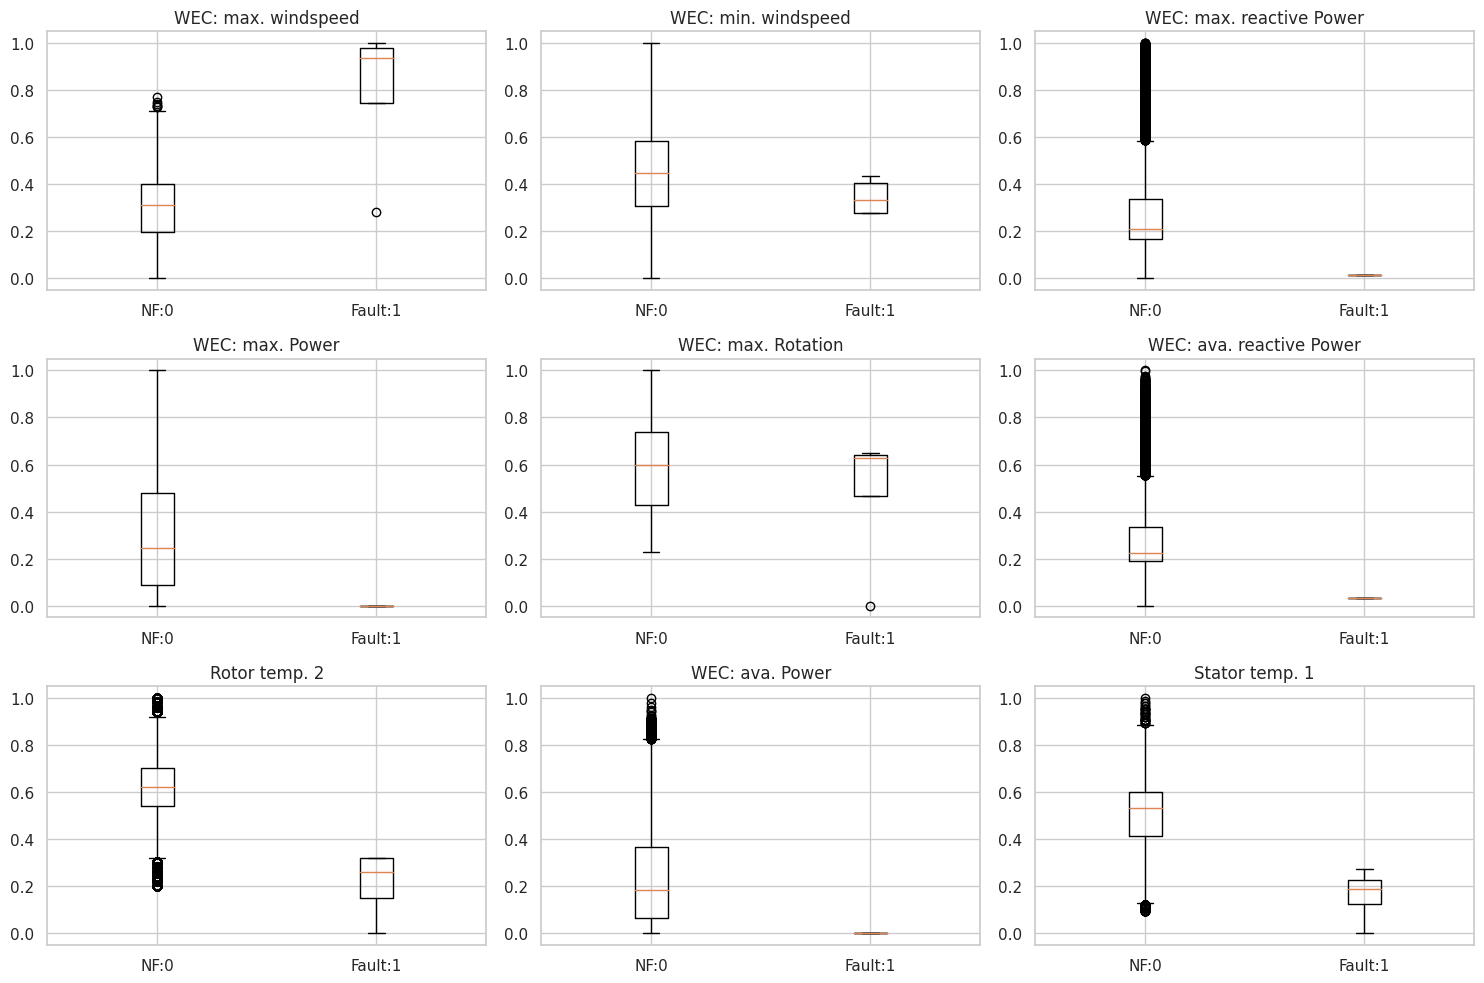

In [1530]:
features = selected_features_xgb
ddf=data_af.copy()

# Filter the data for NF and EF
data_nf = ddf[ddf['Fault'] == 0][features]
data_ef = ddf[ddf['Fault'] == 1][features]

# Create box plots for each feature
plt.figure(figsize=(15, 10))

# Calculate the number of rows and columns for subplots
num_rows = int(len(features) / 3) + (len(features) % 3 > 0)  # Calculate the number of rows needed

for i, feature in enumerate(features):
  plt.subplot(num_rows, 3, i + 1) # Use num_rows to create enough subplots
  plt.boxplot([data_nf[feature], data_ef[feature]], labels=['NF:0', 'Fault:1'])
  plt.title(feature)

plt.tight_layout()
plt.show()

In [1531]:
# prompt: data_nf remove outliers

# Sadece NF verilerini al
nf_data = data_af[data_af['Fault'] == 0]

# Her sütun için boxplot çiz ve aykırı değerleri tespit et
for column in nf_data.columns[:-1]:  # Son sütun 'Fault', onu hariç tutuyoruz
  if nf_data[column].dtype != 'datetime64[ns]': #Datetime columns cannot be processed by boxplot


    # IQR kullanarak aykırı değerleri tespit et
    Q1 = nf_data[column].quantile(0.25)
    Q3 = nf_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    nf_data = nf_data[(nf_data[column] >= lower_bound) & (nf_data[column] <= upper_bound)]


# Temizlenmiş NF verilerini ddf'ye geri ata
data_af = pd.concat([data_af[data_af['Fault'] != 0], nf_data]) # Changed append to concat

data_af=data_af.sort_index()


In [1532]:
# prompt: remove ef_data outliers

# Sadece EF verilerini al
ef_data = data_af[data_af['Fault'] == 1]

# Her sütun için boxplot çiz ve aykırı değerleri tespit et
for column in ef_data.columns[:-1]:  # Son sütun 'Fault', onu hariç tutuyoruz
  if ef_data[column].dtype != 'datetime64[ns]': #Datetime columns cannot be processed by boxplot


    # IQR kullanarak aykırı değerleri tespit et
    Q1 = ef_data[column].quantile(0.25)
    Q3 = ef_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Aykırı değerleri filtrele
    ef_data = ef_data[(ef_data[column] >= lower_bound) & (ef_data[column] <= upper_bound)]


# Temizlenmiş EF verilerini data_af'ye geri ata
data_af = pd.concat([data_af[data_af['Fault'] != 1], ef_data]) # Changed append to concat

data_af=data_af.sort_index()


In [1533]:
data_af

,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,Fault
DateTime_x,,,,,,,,,,
2014-06-08 20:10:00,0.576087,0.446809,0.094276,0.504444,0.796807,0.066406,0.76,0.307394,0.647059,0
2014-06-08 20:21:00,0.505435,0.510638,0.111111,0.712381,0.876633,0.062500,0.72,0.353873,0.623529,0
2014-06-08 21:20:00,0.440217,0.531915,0.067340,0.620000,0.847605,0.050781,0.72,0.369718,0.647059,0
2014-06-09 18:40:00,0.440217,0.489362,0.087542,0.549841,0.821480,0.050781,0.84,0.385563,0.682353,0
2014-06-09 18:49:00,0.467391,0.457447,0.057239,0.480952,0.783019,0.042969,0.80,0.395423,0.658824,0
...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.179348,0.234043,0.154882,0.087937,0.415094,0.164062,0.60,0.051761,0.352941,0
2015-04-08 23:30:00,0.184783,0.308511,0.158249,0.060635,0.390421,0.167969,0.58,0.045070,0.352941,0
2015-04-08 23:39:00,0.244565,0.276596,0.161616,0.104444,0.518868,0.171875,0.58,0.057394,0.352941,0


In [1534]:
# prompt: data_af features rolling lerini al

# Assuming you want to calculate rolling features for the selected features
rolling_window = 100  # Define the rolling window size

for feature in selected_features_xgb:
  # Calculate the rolling mean
  data_af[f'{feature}_rolling_mean'] = data_af[feature].rolling(window=rolling_window, center=True).mean()

  # Calculate the rolling standard deviation
  data_af[f'{feature}_rolling_std'] = data_af[feature].rolling(window=rolling_window, center=True).std()

  # Calculate the rolling max
  data_af[f'{feature}_rolling_max'] = data_af[feature].rolling(window=rolling_window, center=True).max()

  # Calculate the rolling min
  data_af[f'{feature}_rolling_min'] = data_af[feature].rolling(window=rolling_window, center=True).min()

# Now, data_af contains the rolling mean, standard deviation, max, and min for each selected feature.
print(data_af.head())

                     WEC: max. windspeed  WEC: min. windspeed  \
DateTime_x                                                      
2014-06-08 20:10:00             0.576087             0.446809   
2014-06-08 20:21:00             0.505435             0.510638   
2014-06-08 21:20:00             0.440217             0.531915   
2014-06-09 18:40:00             0.440217             0.489362   
2014-06-09 18:49:00             0.467391             0.457447   

                     WEC: max. reactive Power  WEC: max. Power  \
DateTime_x                                                       
2014-06-08 20:10:00                  0.094276         0.504444   
2014-06-08 20:21:00                  0.111111         0.712381   
2014-06-08 21:20:00                  0.067340         0.620000   
2014-06-09 18:40:00                  0.087542         0.549841   
2014-06-09 18:49:00                  0.057239         0.480952   

                     WEC: max. Rotation  WEC: ava. reactive Power  \
DateTime_x  

In [1535]:
# prompt: Nan değerleri olmasın

data_af = data_af.fillna(method='ffill').fillna(method='bfill')

In [1536]:
# prompt: data_af de Fault sütununu en sağa

# Move 'Fault' column to the rightmost position
cols = list(data_af.columns)
cols.remove('Fault')
cols.append('Fault')
data_af = data_af[cols]


In [1537]:
data_af


,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-06-08 20:10:00,0.576087,0.446809,0.094276,0.504444,0.796807,0.066406,0.76,0.307394,0.647059,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-08 20:21:00,0.505435,0.510638,0.111111,0.712381,0.876633,0.062500,0.72,0.353873,0.623529,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-08 21:20:00,0.440217,0.531915,0.067340,0.620000,0.847605,0.050781,0.72,0.369718,0.647059,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-09 18:40:00,0.440217,0.489362,0.087542,0.549841,0.821480,0.050781,0.84,0.385563,0.682353,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-09 18:49:00,0.467391,0.457447,0.057239,0.480952,0.783019,0.042969,0.80,0.395423,0.658824,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.179348,0.234043,0.154882,0.087937,0.415094,0.164062,0.60,0.051761,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:30:00,0.184783,0.308511,0.158249,0.060635,0.390421,0.167969,0.58,0.045070,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:39:00,0.244565,0.276596,0.161616,0.104444,0.518868,0.171875,0.58,0.057394,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0


In [1538]:
data_af[data_af['Fault'] != 0]

,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-10-17 11:49:00,0.902174,0.393617,0.013468,0.0,0.649492,0.03125,0.32,0.0,0.270588,0.407446,...,0.32,0.342835,0.135189,0.572535,0.0,0.599412,0.073449,0.729412,0.270588,1
2014-10-26 18:10:00,1.000000,0.276596,0.013468,0.0,0.000000,0.03125,0.00,0.0,0.000000,0.349891,...,0.00,0.234042,0.137425,0.552465,0.0,0.554000,0.078647,0.717647,0.000000,1
2015-01-07 18:10:00,0.972826,0.276596,0.013468,0.0,0.635704,0.03125,0.20,0.0,0.164706,0.392011,...,0.20,0.287475,0.097636,0.473944,0.0,0.570235,0.056420,0.682353,0.164706,1


In [1539]:
# prompt: 2014-11- 01:49:00	tarihinden itibaren test verisi olsun

test_date = '2014-10-10 02:00:00'

trainhy = data_af[data_af.index < test_date]
testhy = data_af[data_af.index >= test_date]




In [1540]:
data_af


,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-06-08 20:10:00,0.576087,0.446809,0.094276,0.504444,0.796807,0.066406,0.76,0.307394,0.647059,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-08 20:21:00,0.505435,0.510638,0.111111,0.712381,0.876633,0.062500,0.72,0.353873,0.623529,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-08 21:20:00,0.440217,0.531915,0.067340,0.620000,0.847605,0.050781,0.72,0.369718,0.647059,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-09 18:40:00,0.440217,0.489362,0.087542,0.549841,0.821480,0.050781,0.84,0.385563,0.682353,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-09 18:49:00,0.467391,0.457447,0.057239,0.480952,0.783019,0.042969,0.80,0.395423,0.658824,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.179348,0.234043,0.154882,0.087937,0.415094,0.164062,0.60,0.051761,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:30:00,0.184783,0.308511,0.158249,0.060635,0.390421,0.167969,0.58,0.045070,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:39:00,0.244565,0.276596,0.161616,0.104444,0.518868,0.171875,0.58,0.057394,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0


In [1541]:
# prompt: Fault=1 olan tarihten 5 gün önceye git

# Find the index of the row where Fault = 1
#fault_index = data_af[data_af['Fault'] == 1].index[0]

# Calculate the date 5 days before the Fault = 1 date
#before = fault_index - pd.Timedelta(days=15)

# Print the calculated date
#print(before)

# Now you can use this date to split your data into train and test sets.
#trainhy = data_af[data_af.index < before]
#testhy = data_af[data_af.index >= before]

In [1542]:
trainhy

,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-06-08 20:10:00,0.576087,0.446809,0.094276,0.504444,0.796807,0.066406,0.76,0.307394,0.647059,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-08 20:21:00,0.505435,0.510638,0.111111,0.712381,0.876633,0.062500,0.72,0.353873,0.623529,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-08 21:20:00,0.440217,0.531915,0.067340,0.620000,0.847605,0.050781,0.72,0.369718,0.647059,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-09 18:40:00,0.440217,0.489362,0.087542,0.549841,0.821480,0.050781,0.84,0.385563,0.682353,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
2014-06-09 18:49:00,0.467391,0.457447,0.057239,0.480952,0.783019,0.042969,0.80,0.395423,0.658824,0.382174,...,0.56,0.247401,0.084214,0.395423,0.075704,0.575176,0.036440,0.682353,0.505882,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-10-10 01:09:00,0.255435,0.340426,0.178451,0.119048,0.465893,0.214844,0.50,0.103169,0.505882,0.272391,...,0.50,0.170313,0.090568,0.479930,0.034155,0.523412,0.033714,0.588235,0.470588,0
2014-10-10 01:19:00,0.255435,0.340426,0.178451,0.130476,0.478955,0.218750,0.52,0.090493,0.494118,0.271902,...,0.50,0.172148,0.091430,0.479930,0.034155,0.523765,0.034207,0.588235,0.470588,0
2014-10-10 01:30:00,0.271739,0.351064,0.178451,0.124127,0.470972,0.214844,0.54,0.077817,0.494118,0.271033,...,0.50,0.173187,0.091757,0.479930,0.034155,0.524118,0.034569,0.588235,0.470588,0


In [1543]:
#percent = round(len(data_af) - len(data_af)*perc)
#trainhy = data_af.iloc[ :percent, :]

#testhy= data_af.iloc[percent: ,:]

In [1544]:
testhy

,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-10-10 02:10:00,0.222826,0.382979,0.178451,0.128889,0.477504,0.218750,0.58,0.100000,0.494118,0.271250,...,0.50,0.174937,0.091332,0.479930,0.034155,0.524941,0.034947,0.588235,0.470588,0
2014-10-10 02:19:00,0.195652,0.393617,0.178451,0.086984,0.426705,0.218750,0.58,0.079225,0.482353,0.270326,...,0.50,0.173736,0.091348,0.479930,0.034155,0.524941,0.034947,0.588235,0.470588,0
2014-10-10 02:30:00,0.206522,0.425532,0.175084,0.117778,0.465167,0.218750,0.58,0.101056,0.482353,0.269891,...,0.48,0.173370,0.091542,0.479930,0.034155,0.524824,0.034952,0.588235,0.470588,0
2014-10-10 02:40:00,0.288043,0.382979,0.208754,0.187302,0.543541,0.218750,0.60,0.135211,0.494118,0.268750,...,0.48,0.171620,0.090326,0.479930,0.034155,0.524471,0.034963,0.588235,0.470588,0
2014-10-10 02:49:00,0.326087,0.404255,0.218855,0.284127,0.629898,0.218750,0.60,0.136972,0.505882,0.268913,...,0.48,0.171754,0.090340,0.479930,0.034155,0.524235,0.034929,0.588235,0.470588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.179348,0.234043,0.154882,0.087937,0.415094,0.164062,0.60,0.051761,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:30:00,0.184783,0.308511,0.158249,0.060635,0.390421,0.167969,0.58,0.045070,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:39:00,0.244565,0.276596,0.161616,0.104444,0.518868,0.171875,0.58,0.057394,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0


In [1545]:
# prompt: testhy fault 1 olanları göster

testhy[testhy['Fault'] == 1]


,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-10-17 11:49:00,0.902174,0.393617,0.013468,0.0,0.649492,0.03125,0.32,0.0,0.270588,0.407446,...,0.32,0.342835,0.135189,0.572535,0.0,0.599412,0.073449,0.729412,0.270588,1
2014-10-26 18:10:00,1.000000,0.276596,0.013468,0.0,0.000000,0.03125,0.00,0.0,0.000000,0.349891,...,0.00,0.234042,0.137425,0.552465,0.0,0.554000,0.078647,0.717647,0.000000,1
2015-01-07 18:10:00,0.972826,0.276596,0.013468,0.0,0.635704,0.03125,0.20,0.0,0.164706,0.392011,...,0.20,0.287475,0.097636,0.473944,0.0,0.570235,0.056420,0.682353,0.164706,1


In [1546]:
testhy

,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min,Fault
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-10-10 02:10:00,0.222826,0.382979,0.178451,0.128889,0.477504,0.218750,0.58,0.100000,0.494118,0.271250,...,0.50,0.174937,0.091332,0.479930,0.034155,0.524941,0.034947,0.588235,0.470588,0
2014-10-10 02:19:00,0.195652,0.393617,0.178451,0.086984,0.426705,0.218750,0.58,0.079225,0.482353,0.270326,...,0.50,0.173736,0.091348,0.479930,0.034155,0.524941,0.034947,0.588235,0.470588,0
2014-10-10 02:30:00,0.206522,0.425532,0.175084,0.117778,0.465167,0.218750,0.58,0.101056,0.482353,0.269891,...,0.48,0.173370,0.091542,0.479930,0.034155,0.524824,0.034952,0.588235,0.470588,0
2014-10-10 02:40:00,0.288043,0.382979,0.208754,0.187302,0.543541,0.218750,0.60,0.135211,0.494118,0.268750,...,0.48,0.171620,0.090326,0.479930,0.034155,0.524471,0.034963,0.588235,0.470588,0
2014-10-10 02:49:00,0.326087,0.404255,0.218855,0.284127,0.629898,0.218750,0.60,0.136972,0.505882,0.268913,...,0.48,0.171754,0.090340,0.479930,0.034155,0.524235,0.034929,0.588235,0.470588,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.179348,0.234043,0.154882,0.087937,0.415094,0.164062,0.60,0.051761,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:30:00,0.184783,0.308511,0.158249,0.060635,0.390421,0.167969,0.58,0.045070,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0
2015-04-08 23:39:00,0.244565,0.276596,0.161616,0.104444,0.518868,0.171875,0.58,0.057394,0.352941,0.181576,...,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235,0


In [1547]:
scaler = preprocessing.MinMaxScaler()

train=trainhy.drop(columns=['Fault'])
test=testhy.drop(columns=['Fault'])
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)

In [1548]:
test

,WEC: max. windspeed,WEC: min. windspeed,WEC: max. reactive Power,WEC: max. Power,WEC: max. Rotation,WEC: ava. reactive Power,Rotor temp. 2,WEC: ava. Power,Stator temp. 1,WEC: max. windspeed_rolling_mean,...,Rotor temp. 2_rolling_max,Rotor temp. 2_rolling_min,WEC: ava. Power_rolling_mean,WEC: ava. Power_rolling_std,WEC: ava. Power_rolling_max,WEC: ava. Power_rolling_min,Stator temp. 1_rolling_mean,Stator temp. 1_rolling_std,Stator temp. 1_rolling_max,Stator temp. 1_rolling_min
DateTime_x,,,,,,,,,,,,,,,,,,,,,
2014-10-10 02:10:00,0.222826,0.382979,0.178451,0.128889,0.477504,0.218750,0.58,0.100000,0.494118,0.271250,...,0.66,0.50,0.174937,0.091332,0.479930,0.034155,0.524941,0.034947,0.588235,0.470588
2014-10-10 02:19:00,0.195652,0.393617,0.178451,0.086984,0.426705,0.218750,0.58,0.079225,0.482353,0.270326,...,0.66,0.50,0.173736,0.091348,0.479930,0.034155,0.524941,0.034947,0.588235,0.470588
2014-10-10 02:30:00,0.206522,0.425532,0.175084,0.117778,0.465167,0.218750,0.58,0.101056,0.482353,0.269891,...,0.66,0.48,0.173370,0.091542,0.479930,0.034155,0.524824,0.034952,0.588235,0.470588
2014-10-10 02:40:00,0.288043,0.382979,0.208754,0.187302,0.543541,0.218750,0.60,0.135211,0.494118,0.268750,...,0.66,0.48,0.171620,0.090326,0.479930,0.034155,0.524471,0.034963,0.588235,0.470588
2014-10-10 02:49:00,0.326087,0.404255,0.218855,0.284127,0.629898,0.218750,0.60,0.136972,0.505882,0.268913,...,0.66,0.48,0.171754,0.090340,0.479930,0.034155,0.524235,0.034929,0.588235,0.470588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-04-08 23:20:00,0.179348,0.234043,0.154882,0.087937,0.415094,0.164062,0.60,0.051761,0.352941,0.181576,...,0.70,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235
2015-04-08 23:30:00,0.184783,0.308511,0.158249,0.060635,0.390421,0.167969,0.58,0.045070,0.352941,0.181576,...,0.70,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235
2015-04-08 23:39:00,0.244565,0.276596,0.161616,0.104444,0.518868,0.171875,0.58,0.057394,0.352941,0.181576,...,0.70,0.32,0.070042,0.052047,0.208803,0.000352,0.346824,0.085173,0.482353,0.188235


In [1549]:
# reshape inputs for LSTM [samples, timesteps, features]
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
print("Training data shape:", X_train.shape)
X_test = X_test.reshape(X_test.shape[0],1, X_test.shape[1])
print("Test data shape:", X_test.shape)

Training data shape: (12544, 1, 45)
Test data shape: (10723, 1, 45)


In [1550]:
model4 = Sequential()

model4.add(GRU(16, activation='linear', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2])))
model4.add(GRU(4, activation='linear', return_sequences=False))
model4.add(RepeatVector(X_train.shape[1]))
model4.add(GRU(4, activation='linear', return_sequences=True))
model4.add(GRU(16, activation='linear', return_sequences=True))
model4.add(TimeDistributed(Dense(X_train.shape[2])))
model4.compile(optimizer='adam', loss='mae')
model4.summary()

# fit the model to the data
history4=History()
nb_epochs = 100
batch_size = 32
history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_118 (GRU)                        │ (None, 1, 16)               │           3,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_119 (GRU)                        │ (None, 4)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_16 (RepeatVector)      │ (None, 1, 4)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_120 (GRU)                        │ (None, 1, 4)                │             120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_121 (GRU)                        │ (None, 1, 16)               │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_34                  │ (None, 1, 45)               │             765 │
│ (TimeDistributed)                    │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,229 (20.43 KB)

 Trainable params: 5,229 (20.43 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.2025 - val_loss: 0.1156
Epoch 2/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1200 - val_loss: 0.1126
Epoch 3/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1165 - val_loss: 0.1121
Epoch 4/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1139 - val_loss: 0.1037
Epoch 5/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.1075 - val_loss: 0.0983
Epoch 6/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.1017 - val_loss: 0.0928
Epoch 7/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0979 - val_loss: 0.0882
Epoch 8/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0953 - val_loss: 0.0865
Epoch 9/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0947 - val_loss: 0.0836
Epoch 10/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.0938 - val_loss: 0.0814
Epoch 11/100
373/373 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0930 - val_loss: 0.0795
Epoch 12/100
373/373 ━━━━━━━━━━━━━━━━━━━

In [1551]:
joblib.dump(model4, 'model4.pkl')


['model4.pkl']

# prompt: aktivasyon fonksiyonu optimizasyonu ya
nb_epochs = 10

# Define a list of activation functions to try
activation_functions = ['relu', 'tanh', 'sigmoid', 'linear', 'silu', 'softmax', 'mish']

# Create a loop to iterate through the activation functions
for activation in activation_functions:
  print(f"Training with activation function: {activation}")

  # Create a new model with the current activation function
  model4 = Sequential()
  model4.add(GRU(16, activation=activation, return_sequences=True,
                kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2])))
  model4.add(GRU(4, activation=activation, return_sequences=False))
  model4.add(RepeatVector(X_train.shape[1]))
  model4.add(GRU(4, activation=activation, return_sequences=True))
  model4.add(GRU(16, activation=activation, return_sequences=True))
  model4.add(TimeDistributed(Dense(X_train.shape[2])))
  model4.compile(optimizer='adam', loss='mae')

  # Train the model
  history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history

  # Evaluate the model and print the results
  loss = model4.evaluate(X_test, X_test, verbose=0)
  print(f"Test Loss with {activation}: {loss}")

# Choose the activation function that yields the best test loss


# prompt: aktivasyon fonksiyonu ile dene
nb_epochs = 50

# Define a list of activation functions to try
activation_functions = ['linear']

# Create a loop to iterate through the activation functions
for activation in activation_functions:
  print(f"Training with activation function: {activation}")

  # Create a new model with the current activation function
  model4 = Sequential()
  model4.add(GRU(16, activation=activation, return_sequences=True,
                kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2])))
  model4.add(GRU(4, activation=activation, return_sequences=False))
  model4.add(RepeatVector(X_train.shape[1]))
  model4.add(GRU(4, activation=activation, return_sequences=True))
  model4.add(GRU(16, activation=activation, return_sequences=True))
  model4.add(TimeDistributed(Dense(X_train.shape[2])))
  model4.compile(optimizer='adam', loss='mae')

  # Train the model
  history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history

  # Evaluate the model and print the results
  loss = model4.evaluate(X_test, X_test, verbose=0)
  print(f"Test Loss with {activation}: {loss}")

# Choose the activation function that yields the best test loss


# prompt: bi directional gru model

from keras.layers import Bidirectional

model4 = Sequential()

model4.add(Bidirectional(GRU(16, activation='tanh', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00), input_shape=(X_train.shape[1], X_train.shape[2]))))
model4.add(Bidirectional(GRU(4, activation='tanh', return_sequences=False)))
model4.add(RepeatVector(X_train.shape[1]))
model4.add(Bidirectional(GRU(4, activation='tanh', return_sequences=True)))
model4.add(Bidirectional(GRU(16, activation='tanh', return_sequences=True)))
model4.add(TimeDistributed(Dense(X_train.shape[2])))
model4.compile(optimizer='adam', loss='mae')
model4.summary()

# fit the model to the data
history4=History()
nb_epochs = 30
batch_size = 32
history4 = model4.fit(X_train, X_train, epochs=nb_epochs, batch_size=batch_size,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history


In [1552]:
# prompt: GRU modele CNN spatio temporal yeni model ekle
from keras.layers import Bidirectional
from keras.layers import Conv1D, MaxPooling1D, Flatten, Reshape, Add, concatenate, BatchNormalization, UpSampling1D

def cnn_spatio_temporal_gru_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))

    # CNN Spatio-Temporal Feature Extraction
    x = Conv1D(filters=64, kernel_size=3, activation='linear', padding='same')(inputs)
    x = MaxPooling1D(pool_size=2, padding='same')(x)
    x = Conv1D(filters=64, kernel_size=3, activation='linear', padding='same')(x)
    x = MaxPooling1D(pool_size=2, padding='same')(x)


    # GRU for temporal feature extraction

    x1 = Bidirectional(GRU(32, activation='linear', return_sequences=True,
                           kernel_regularizer=regularizers.l2(0.00)))(inputs)
    x2 = Bidirectional(GRU(32, activation='linear', return_sequences=True,
                           kernel_regularizer=regularizers.l2(0.00)))(inputs)
    x =  concatenate(inputs=[x1, x2]) # Corrected line

    x = GRU(16, activation='linear', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(x)


    # Decoder
    x = UpSampling1D(2)(x)
    x = Conv1D(filters=32, kernel_size=3, activation='linear', padding='same')(x)
    x = UpSampling1D(2)(x)
    x = Conv1D(filters=32, kernel_size=3, activation='linear', padding='same')(x)

    output = TimeDistributed(Dense(X.shape[2]))(x)

    model = Model(inputs=inputs, outputs=output)
    return model


model_cnn_gru = cnn_spatio_temporal_gru_model(X_train)
model_cnn_gru.compile(optimizer='adam', loss='mae')
model_cnn_gru.summary()

# Fit the model to the data
history_cnn_gru = model_cnn_gru.fit(X_train, X_train, epochs=50, batch_size=32,
                  validation_split=0.05, callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, mode='min')], shuffle=False).history



Model: "functional_120"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_35            │ (None, 1, 45)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_36          │ (None, 1, 64)          │         15,168 │ input_layer_35[0][0]   │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_37          │ (None, 1, 64)          │         15,168 │ input_layer_35[0][0]   │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_18            │ (None, 1, 128)         │              0 │ bidirectional_36[0][0… │
│ (Concatenate)             │                        │                │ bidirectional_37[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ gru_124 (GRU)             │ (None, 1, 16)          │          7,008 │ concatenate_18[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_36          │ (None, 2, 16)          │              0 │ gru_124[0][0]          │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_74 (Conv1D)        │ (None, 2, 32)          │          1,568 │ up_sampling1d_36[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling1d_37          │ (None, 4, 32)          │              0 │ conv1d_74[0][0]        │
│ (UpSampling1D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_75 (Conv1D)        │ (None, 4, 32)          │          3,104 │ up_sampling1d_37[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_35       │ (None, 4, 45)          │          1,485 │ conv1d_75[0][0]        │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 43,501 (169.93 KB)

 Trainable params: 43,501 (169.93 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50


KeyboardInterrupt: 

In [ ]:
# prompt: modeli kaydet

# Save the trained model
joblib.dump(model_cnn_gru, 'model_cnn_gru.pkl')


In [ ]:
# Compare the training loss of each model

plt.plot(history_cnn_gru['loss'], label='GRU Model tanh')

plt.title('Training Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Compare the validation loss of each model

plt.plot(history_cnn_gru['val_loss'], label='GRU Model tanh')

plt.title('Validation Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#history=history4
#model=model4

history=history_cnn_gru
model=model_cnn_gru
# plot the training losses
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [ ]:
# prompt: bu model ile prediction yap mae mse rmse mape hesapla
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
import numpy as np

if model == model_cnn_gru:
    X_pred = model.predict(X_test)


    # Reshape to (samples, features) while considering the timesteps
    mae = mean_absolute_error(X_test.reshape(X_test.shape[0], -1),
                              X_pred[:, -1, :].reshape(X_pred.shape[0], -1)) # Use only the last timestep of predictions
    mse = mean_squared_error(X_test.reshape(X_test.shape[0], -1),
                              X_pred[:, -1, :].reshape(X_pred.shape[0], -1)) # Use only the last timestep of predictions
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(X_test.reshape(X_test.shape[0], -1),
                                        X_pred[:, -1, :].reshape(X_pred.shape[0], -1)) # Use only the last timestep of predictions

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")


In [ ]:
# prompt: # prompt: bu model ile prediction yap mae mse rmse mape ve r2 hesapla

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

if model == model_cnn_gru:
    X_pred = model.predict(X_test)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_test.reshape(X_test.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"MAPE: {mape}")
    print(f"R2: {r2}")

In [ ]:
# plot the loss distribution of the training set


X_pred = model.predict(X_train)

if model == model4:
    X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
else:
    X_pred = X_pred[:, -1, :]
    X_pred = X_pred.reshape(X_pred.shape[0], -1)

X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)
if model == model4:
    Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
else:
    Xtrain = X_train[:, -1, :]
    Xtrain = Xtrain.reshape(X_train.shape[0], -1)
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)

In [ ]:
features

In [ ]:
# Kayıp değerlerini alın
loss_values = scored['Loss_mae'].values

# Kayıp değerlerinin z-skorlarını hesaplayın
z_scores = (loss_values - np.mean(loss_values)) / np.std(loss_values)

# Eşik değeri için bir z-score belirleyin
threshold_z_score = 5 # Örnek olarak, 3.0 z-score'u kullanıyoruz

# Eşik değeri hesaplayın
threshold_value = np.mean(loss_values) + threshold_z_score * np.std(loss_values)

# Eşik değeri görselleştirin
plt.figure(figsize=(16, 9), dpi=80)
plt.title(' otomatik esik', fontsize=16)
sns.distplot(scored['Loss_mae'], bins=20, kde=True, color='blue')
plt.axvline(x=threshold_value, color='red', linestyle='--', label=f'Threshold = {threshold_value}')
plt.legend()


# Eşik değerini ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {threshold_value}")

In [ ]:
# prompt: train veriseti üzerinden F1 skora göre threshold belirle  (şayet trainde fault var ise F1 skora göre belirler, train tamamı normal ise bu defa, itreasyon ile anomaly==0 olacak şekilde en küçük treshold belirler))

from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
from sklearn.metrics import precision_recall_curve

# Tahmin edilen anomali skorlarını (Loss_mae) alın
y_scores = scored['Loss_mae'].values

# Gerçek etiketleri (Fault) alın
y_true = trainhy['Fault'].values

# F1 skorunu maksimize eden eşik değerini bulun
precision, recall, thresholds = precision_recall_curve(y_true, y_scores)
f1_scores = 2 * (precision * recall) / (precision + recall)
f1_scores = [score if not np.isnan(score) else 0 for score in f1_scores]
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds[optimal_idx]

print(f"F1 skoru için en iyi eşik değeri: {optimal_threshold}")

# Eşik değeri kullanarak tahminleri oluşturun
y_pred = [1 if score > optimal_threshold else 0 for score in y_scores]

# Performansı değerlendirin
f1 = f1_score(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f"F1 skoru: {f1}")
print(f"Doğruluk: {accuracy}")
print(f"Keskinlik: {precision}")
print(f"Duyarlılık: {recall}")

# Eşik değeri ve tespit edilen anomalileri yazdırın
print(f"Otomatik olarak belirlenen eşik değeri: {optimal_threshold}")

# İsteğe bağlı olarak, bulduğunuz eşik değerini kullanarak anomali tespitini yapabilirsiniz:
# anomalies = scored[scored['Loss_mae'] > optimal_threshold]

if f1==0:
    threshold_values = np.linspace(0, 5, 50)  # 0 ile 1 arasında 50 eşik değeri oluştur
    num_anomalies_list = []

    for threshold in threshold_values:
        X_pred = model.predict(X_train)

        if model == model4:
            X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
        else:
            X_pred = X_pred[:, -1, :]
            X_pred = X_pred.reshape(X_pred.shape[0], -1)

        X_pred = pd.DataFrame(X_pred, columns=train.columns)
        X_pred.index = train.index

        scored = pd.DataFrame(index=train.index)
        if model == model4:
            Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
        else:
            Xtrain = X_train[:, -1, :]
            Xtrain = Xtrain.reshape(X_train.shape[0], -1)
        scored['Loss_mae'] = np.mean(np.abs(X_pred - Xtrain), axis=1)

        # Anomalileri tespit et
        anomalies = scored[scored['Loss_mae'] > threshold]

        num_anomalies_list.append(len(anomalies))

    # 0 anomali sayısına sahip ilk eşik değerini bul
    for i, num_anomalies in enumerate(num_anomalies_list):
        if num_anomalies == 0:
            first_threshold_with_zero_anomalies = threshold_values[i]
            print(f"0 anomaliye sahip ilk eşik değeri: {first_threshold_with_zero_anomalies}")
            threshold_value = first_threshold_with_zero_anomalies
            break
else:
    threshold_value = optimal_threshold



In [ ]:
threshold_value=optimal_threshold

In [ ]:
threshold_value

In [ ]:
# plot the loss distribution of the training set


X_pred = model.predict(X_train)
  # Son zaman adımının tahminlerini seçin
if model == model4:
  X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
else:
  X_pred = X_pred[:, -1, :]
  X_pred = X_pred.reshape(X_pred.shape[0], -1)
  # X_pred'i 2 boyutlu hale getirin

X_pred = pd.DataFrame(X_pred, columns=train.columns)
X_pred.index = train.index

scored = pd.DataFrame(index=train.index)

if model == model4:
    Xtrain = X_train.reshape(X_train.shape[0], X_train.shape[2])
else:
    Xtrain = X_train[:, -1, :]
    Xtrain = Xtrain.reshape(X_train.shape[0], -1)
scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtrain), axis = 1)

In [ ]:
X_pred = model.predict(X_test)

if model == model4:
  X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])
else:
  X_pred = X_pred[:, -1, :]
  X_pred = X_pred.reshape(X_pred.shape[0], -1)

X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

scored= pd.DataFrame(index=test.index)
if model == model4:
  Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
else:
  Xtest = X_test[:, -1, :]
  Xtest = X_test.reshape(X_pred.shape[0], -1)

scored['Loss_mae'] = np.mean(np.abs(X_pred-Xtest), axis = 1)

In [ ]:
X_pred

In [ ]:
Xtest

In [ ]:
# prompt: plotly ile çiz ve threshold çizgisini ve gerçek arıza noktalarını yerleştir

import plotly.graph_objects as go
scored_test=scored.copy()
scored_test['Fault']=testhy['Fault']
# Calculate the exponential moving average (EMA)
window = 6 # Adjust the window size as needed
scored_test['EMA'] = scored_test['Loss_mae'].ewm(span=window, adjust=False).mean()

# Create a figure
fig = go.Figure()

# Add the loss values as a scatter plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['Loss_mae'],
    mode='lines',
    name='Loss'
))

# Add the EMA as a line plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['EMA'],
    mode='lines',
    name='EMA'
))

# Add the threshold line
fig.add_shape(
    type="line",
    x0=scored_test.index.min(),
    x1=scored_test.index.max(),
    y0=threshold_value,
    y1=threshold_value,
    line=dict(
        color="red",
        dash="dash",
    )
)

# Add the actual fault points
fault_indices = testhy[testhy['Fault'] == 1].index
fig.add_trace(go.Scatter(
    x=fault_indices,
    y=scored_test.loc[fault_indices]['Loss_mae'],
    mode='markers',
    name='Actual Faults',
    marker=dict(
        color='green',
        size=8
    )
))

# Set the layout
fig.update_layout(
    title="Test Data Loss over Time with Threshold and Actual Faults",
    xaxis_title="Time",
    yaxis_title="Loss",
    showlegend=True
)

# Display the plot
fig.show()


In [ ]:
# prompt: eşiğin aşıldığı  zamanları tarih bilgisiyle birlikte kesikli çizgilerle grafikte göster göster

import plotly.graph_objects as go

# ... (Your existing code) ...

# Create a figure
fig = go.Figure()




# Add the loss values as a scatter plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['Loss_mae'],
    mode='lines',
    name='Loss'
))

# Add the EMA as a line plot
fig.add_trace(go.Scatter(
    x=scored_test.index,
    y=scored_test['EMA'],
    mode='lines',
    name='EMA'
))

# Add the threshold line
fig.add_shape(
    type="line",
    x0=scored_test.index.min(),
    x1=scored_test.index.max(),
    y0=threshold_value,
    y1=threshold_value,
    line=dict(
        color="red",
        dash="dash",
    )
)


# Find the time points where the threshold is exceeded
threshold_exceeded_indices = scored_test[scored_test['Loss_mae'] > threshold_value].index

# Add vertical lines for threshold exceedances
for index in threshold_exceeded_indices:
  fig.add_shape(
      type="line",
      x0=index,
      x1=index,
      y0=0,
      y1=scored_test['Loss_mae'].max(),
      line=dict(
          color="black",
          dash="dash",
      )
  )

# Add the actual fault points
fault_indices = testhy[testhy['Fault'] == 1].index
fig.add_trace(go.Scatter(
    x=fault_indices,
    y=scored_test.loc[fault_indices]['Loss_mae'],
    mode='markers',
    name='Actual Faults',
    marker=dict(
        color='green',
        size=8
    )
))

# Set the layout
fig.update_layout(
    title="Test Data Loss over Time with Threshold and Actual Faults",
    xaxis_title="Time",
    yaxis_title="Loss",
    showlegend=True
)

# Display the plot
fig.show()


In [ ]:
# prompt: eşiğin aşılma zamanlarını göster

# Find the time points where the threshold is exceeded
threshold_exceeded_indices = scored_test[scored_test['Loss_mae'] > threshold_value].index

# Print the time points
print("Eşik Değerini Aşan Zaman Noktaları:")
for index in threshold_exceeded_indices:
  print(index)

In [ ]:
# prompt: doğru negatifleri de kullan

# ... (Your existing code) ...

# Gerçek arızaları ve tespit edilen arızaları karşılaştır
true_positives = 0
false_positives = 0
false_negatives = 0
true_negatives = 0  # Doğru negatifleri hesaplamak için değişken

for index, row in scored_test.iterrows():
    if row['Fault'] == 1 and row['Loss_mae'] > threshold_value:
        true_positives += 1
    elif row['Fault'] == 0 and row['Loss_mae'] > threshold_value:
        false_positives += 1
    elif row['Fault'] == 1 and row['Loss_mae'] <= threshold_value:
        false_negatives += 1
    elif row['Fault'] == 0 and row['Loss_mae'] <= threshold_value:
        true_negatives += 1  # Doğru negatifleri say

# Doğruluk, hassasiyet, geri çağırma ve F1 puanını hesapla
if true_positives + false_positives > 0:
    precision = true_positives / (true_positives + false_positives)
else:
    precision = 0

if true_positives + false_negatives > 0:
    recall = true_positives / (true_positives + false_negatives)
else:
    recall = 0

if precision + recall > 0:
    f1_score = 2 * (precision * recall) / (precision + recall)
else:
    f1_score = 0

accuracy = (true_positives + true_negatives) / len(scored_test)

# Sonuçları yazdır
print("Doğru Pozitifler:", true_positives)
print("Yanlış Pozitifler:", false_positives)
print("Yanlış Negatifler:", false_negatives)
print("Doğru Negatifler:", true_negatives)  # Doğru negatifleri yazdır
print("Hassasiyet:", precision)
print("Geri Çağırma:", recall)
print("F1 Puanı:", f1_score)
print("Doğruluk:", accuracy)

In [ ]:
# prompt: Doğru Pozitifler:
# Yanlış Pozitifler:
# Yanlış Negatifler:
# Doğru Negatifler:         değerlerini manuel gir ve metrikleri hesapla

# Değerleri manuel olarak girin
true_positives = 10
false_positives = 1
false_negatives = 0
true_negatives = true_negatives

# Hassasiyet hesapla
if true_positives + false_positives > 0:
  precision = true_positives / (true_positives + false_positives)
else:
  precision = 0

# Geri çağırma hesapla
if true_positives + false_negatives > 0:
  recall = true_positives / (true_positives + false_negatives)
else:
  recall = 0

# F1 puanı hesapla
if precision + recall > 0:
  f1_score = 2 * (precision * recall) / (precision + recall)
else:
  f1_score = 0

# Doğruluk hesapla
accuracy = (true_positives + true_negatives) / (true_positives + false_positives + false_negatives + true_negatives)


# Sonuçları yazdır
print("Doğru Pozitifler:", true_positives)
print("Yanlış Pozitifler:", false_positives)
print("Yanlış Negatifler:", false_negatives)
print("Doğru Negatifler:", true_negatives)
print("Hassasiyet:", precision)
print("Geri Çağırma:", recall)
print("F1 Puanı:", f1_score)
print("Doğruluk:", accuracy)

In [ ]:
# prompt: yukarıdaki modeli kullanarak predicition yap

# Make predictions on the test data

X_pred = model.predict(X_test)

    # Reshape the predictions
if model==model4:
        X_pred = X_pred.reshape(X_pred.shape[0], X_pred.shape[2])

else:
        X_pred = X_pred[:, -1, :]
        X_pred = X_pred.reshape(X_pred.shape[0], -1)


    # Convert predictions to a DataFrame
X_pred = pd.DataFrame(X_pred, columns=test.columns)
X_pred.index = test.index

    # Calculate the reconstruction loss
scored = pd.DataFrame(index=test.index)
if model==model4:

   Xtest = X_test.reshape(X_test.shape[0], X_test.shape[2])
else:
   Xtest = X_test[:, -1, :]
   Xtest = Xtest.reshape(X_test.shape[0], -1)

scored['Loss_mae'] = np.mean(np.abs(X_pred - Xtest), axis=1)

    # Add the actual fault values to the scored DataFrame
scored['Fault'] = testhy['Fault']

    # Calculate the EMA (Exponential Moving Average)
window = 50  # Adjust the window size as needed
scored['EMA'] = scored['Loss_mae'].ewm(span=window, adjust=False).mean()

    # Identify anomalies based on the threshold
anomalies = scored[scored['Loss_mae'] > threshold_value]

    # Print the anomalies
print("Anomalies:")
print(anomalies)


In [ ]:
Xtest

In [ ]:
# prompt: feature selection sütunlarını göster
selected_features_xgb

In [ ]:
import plotly.graph_objects as go

# Assuming 'scaler1' is the MinMaxScaler object used for scaling
X_pred_original = scaler.inverse_transform(X_pred)
Xtest_original = scaler.inverse_transform(Xtest)

# Create a DataFrame with the original values
X_pred_org = pd.DataFrame(X_pred_original, columns=test.columns, index=test.index)
Xtest_org = pd.DataFrame(Xtest_original, columns=test.columns, index=test.index)

# Select a few features for visualization
features_to_plot = my_tuple

# Create subplots for each selected feature
for feature in features_to_plot:
  fig = go.Figure()

  # Plot X_pred values
  fig.add_trace(go.Scatter(
      x=X_pred_org.index,
      y=X_pred_org[feature],
      mode='lines',
      name='X_pred',
      line=dict(color='blue')
  ))

  # Plot X_test values
  fig.add_trace(go.Scatter(
      x=X_pred_org.index,
      y=Xtest_org[feature],  # Use the column name directly to access the values
      mode='lines',
      name='X_test',
      line=dict(color='red')
  ))

      # Add the threshold line
  fig.add_shape(
      type="line",
      x0=scored_test.index.min(),
      x1=scored_test.index.max(),
      y0=threshold_value,
      y1=threshold_value,
      line=dict(
          color="red",
          dash="dash"
  ))

  fig.update_layout(
      title=f"Comparison of {feature} between X_pred and X_test",
      xaxis_title="Time",
      yaxis_title=feature,
      showlegend=True
  )

  fig.show()

In [ ]:
data_af

In [ ]:
# prompt: data_af her bir features isimleri için ayrı ayrı  test ve train için mae mape rmse mse r2 değerlerini hesapla

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

if model == model_cnn_gru:
    X_pred = model.predict(X_test)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_test.reshape(X_test.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    for feature_index in range(y_true.shape[1]):
        feature_y_true = y_true[:, feature_index]
        feature_y_pred = y_pred[:, feature_index]

        mae = mean_absolute_error(feature_y_true, feature_y_pred)
        mse = mean_squared_error(feature_y_true, feature_y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(feature_y_true, feature_y_pred)
        r2 = r2_score(feature_y_true, feature_y_pred)

        print(f"Feature {test.columns[feature_index]}")
        print(f"  MAE: {mae}")
        print(f"  MSE: {mse}")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}")
        print(f"  R2: {r2}")


if model == model_cnn_gru:
    X_pred = model.predict(X_train)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_train.reshape(X_train.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    for feature_index in range(y_true.shape[1]):
        feature_y_true = y_true[:, feature_index]
        feature_y_pred = y_pred[:, feature_index]

        mae = mean_absolute_error(feature_y_true, feature_y_pred)
        mse = mean_squared_error(feature_y_true, feature_y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(feature_y_true, feature_y_pred)
        r2 = r2_score(feature_y_true, feature_y_pred)

        print(f"Train Feature {train.columns[feature_index]}")
        print(f"  MAE: {mae}")
        print(f"  MSE: {mse}")
        print(f"  RMSE: {rmse}")
        print(f"  MAPE: {mape}")
        print(f"  R2: {r2}")

In [ ]:
# prompt:       print(f"Train Feature {train.columns[feature_index]}")
#         print(f"  MAE: {mae}")
#         print(f"  MSE: {mse}")
#         print(f"  RMSE: {rmse}")
#         print(f"  MAPE: {mape}")
#         print(f"  R2: {r2}")     sonuçları için tablo oluştur

import pandas as pd

results_data = []

if model == model_cnn_gru:
    X_pred = model.predict(X_train)

    # Reshape to (samples, features) while considering the timesteps
    y_true = X_train.reshape(X_train.shape[0], -1)
    y_pred = X_pred[:, -1, :].reshape(X_pred.shape[0], -1)  # Use only the last timestep of predictions

    for feature_index in range(y_true.shape[1]):
        feature_y_true = y_true[:, feature_index]
        feature_y_pred = y_pred[:, feature_index]

        mae = mean_absolute_error(feature_y_true, feature_y_pred)
        mse = mean_squared_error(feature_y_true, feature_y_pred)
        rmse = np.sqrt(mse)
        mape = mean_absolute_percentage_error(feature_y_true, feature_y_pred)
        r2 = r2_score(feature_y_true, feature_y_pred)

        results_data.append([train.columns[feature_index], mae, mse, rmse, mape, r2])

results_df = pd.DataFrame(results_data, columns=['Feature', 'MAE', 'MSE', 'RMSE', 'MAPE', 'R2'])
results_df

In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=results_df)

In [ ]:
# prompt: grafiğin arka planı beyaz olsu

fig.update_layout(
    plot_bgcolor='white',  # Arka plan rengini beyaz olarak ayarlayın
    xaxis=dict(gridcolor='lightgray'),  # X ekseni ızgara rengini açık gri olarak ayarlayın
    yaxis=dict(gridcolor='lightgray')   # Y ekseni ızgara rengini açık gri olarak ayarlayın
)
fig.show()
